---

### Demonstrate Usage of Datasets Module

* list available dataset
* get dataset from available datasets


In [1]:
import matplotlib.pyplot as plt
import numpy as np

import robust_scene_change_detect.datasets as datasets
import robust_scene_change_detect.torch_utils as torch_utils

import py_utils.utils_img as utils_img

In [2]:
print("\n".join(datasets.list_data()))

VL_CMU_CD
VL_CMU_CD_Diff_View
PSCD
PSCD_Diff_View
PSCD_Full


In [3]:
# `mode` can be "train", "val", or "test"

kwargs = {"mode": "test"}

D = datasets.get_dataset("VL_CMU_CD", **kwargs)
print(D)
print("length of D: %d" % len(D))
print("figure size:", D.figsize)

length of D: 429
figure size: [512 512]


In [4]:
# `mode` can be "train", "val", or "test"
# `adjacent_distance` can be any arbitrary number

# kwargs = {"mode": "test", "adjacent_distance": 5}
# kwargs = {"mode": "test", "adjacent_distance": 2}
kwargs = {"mode": "test", "adjacent_distance": -2}

D = datasets.get_dataset("VL_CMU_CD_Diff_View", **kwargs)
print(D)
print("length of D: %d" % len(D))
print("figure size:", D.figsize)

length of D: 323
figure size: [512 512]


In [5]:
# `mode` can be "train", "val", or "test"

kwargs = {"mode": "test"}

D = datasets.get_dataset("PSCD", **kwargs)
print(D)
print("length of D: %d" % len(D))
print("figure size:", D.figsize)

length of D: 1155
figure size: [224 224]


In [6]:
# `mode` can be "train", "val", or "test"
# `adjacent_distance` can be any arbitrary number

# kwargs = {"mode": "test", "adjacent_distance": -2}
kwargs = {"mode": "test", "adjacent_distance": 2}

D = datasets.get_dataset("PSCD_Diff_View", **kwargs)
print(D)
print("length of D: %d" % len(D))
print("figure size:", D.figsize)

length of D: 1001
figure size: [224 224]


In [7]:
# `mode` can be "train", "val", or "test"

kwargs = {"mode": "test"}

D = datasets.get_dataset("PSCD_Full", **kwargs)
print(D)
print("length of D: %d" % len(D))
print("figure size:", D.figsize)

length of D: 77
figure size: [ 224 1024]


VL_CMU_CD

In [8]:
mode = "test"
adj_dist = -5

dataset1 = datasets.get_dataset(
    "VL_CMU_CD",
    mode=mode,
)

dataset2 = datasets.get_dataset(
    "VL_CMU_CD_Diff_View",
    mode=mode,
    adjacent_distance=adj_dist,
)

dataset3 = datasets.get_dataset(
    "VL_CMU_CD_Diff_View",
    mode=mode,
    adjacent_distance=-adj_dist,
)

len(dataset1), len(dataset2), len(dataset3)

(429, 181, 181)

In [9]:
filenames = set(dataset2.t0_dataset.filenames.tolist())
filenames = filenames.intersection(set(dataset3.t0_dataset.filenames.tolist()))
filenames = list(filenames)

i = np.random.randint(0, len(filenames) - 1, 1)[0]

# find the corresponding index by the searching t1 filename
filename = filenames[i]
filename

'139_1_06_0.png'

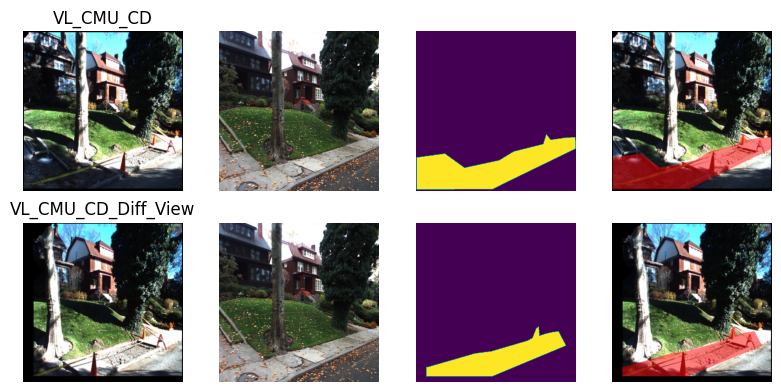

In [10]:
# different t0 with the same t1

ind1 = np.searchsorted(dataset1.filenames, filename)
ind2 = np.searchsorted(dataset2.t1_dataset.filenames, filename)

t0_1, t1_1, mask_1 = dataset1[ind1]
t0_2, t1_2, mask_2 = dataset2[ind2]

fig, axs = plt.subplots(2, 4, figsize=(8, 4))
axs[0, 0].imshow(t0_1)
axs[0, 1].imshow(t1_1)
axs[0, 2].imshow(mask_1)
axs[0, 3].imshow(
    utils_img.overlay_image(t0_1, [1, 0, 0], ratio=0.5, mask=mask_1),
)

axs[1, 0].imshow(t0_2)
axs[1, 1].imshow(t1_2)
axs[1, 2].imshow(mask_2)
axs[1, 3].imshow(
    utils_img.overlay_image(t0_2, [1, 0, 0], ratio=0.5, mask=mask_2),
)

axs[0, 0].set_title("VL_CMU_CD")
axs[1, 0].set_title("VL_CMU_CD_Diff_View")

for i in axs.ravel():
    i.axis("off")

fig.tight_layout()

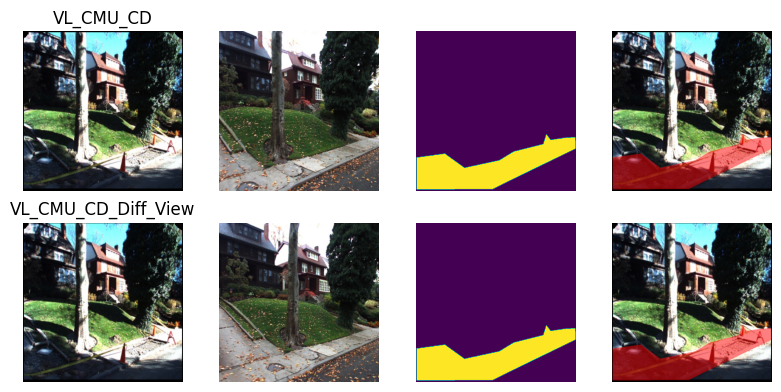

In [11]:
# different t1 with the same t0

ind1 = np.searchsorted(dataset1.filenames, filename)
ind2 = np.searchsorted(dataset2.t0_dataset.filenames, filename)

t0_1, t1_1, mask_1 = dataset1[ind1]
t0_2, t1_2, mask_2 = dataset2[ind2]

fig, axs = plt.subplots(2, 4, figsize=(8, 4))
axs[0, 0].imshow(t0_1)
axs[0, 1].imshow(t1_1)
axs[0, 2].imshow(mask_1)
axs[0, 3].imshow(
    utils_img.overlay_image(t0_1, [1, 0, 0], ratio=0.5, mask=mask_1),
)

axs[1, 0].imshow(t0_2)
axs[1, 1].imshow(t1_2)
axs[1, 2].imshow(mask_2)
axs[1, 3].imshow(
    utils_img.overlay_image(t0_2, [1, 0, 0], ratio=0.5, mask=mask_2),
)

axs[0, 0].set_title("VL_CMU_CD")
axs[1, 0].set_title("VL_CMU_CD_Diff_View")

for i in axs.ravel():
    i.axis("off")

fig.tight_layout()

original dataset has 429 samples
filtered dataset has 228 samples


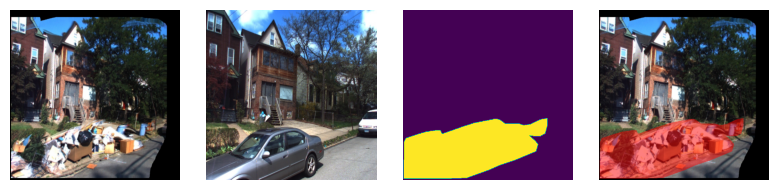

In [12]:
# locate operation
# uncomment to check each option

mode = "test"
adj_dist = -5

dataset1 = datasets.get_dataset(
    "VL_CMU_CD",
    mode=mode,
)

# option 1: slice
s = slice(None, 120, 10)
d = dataset1.loc(s)

# option 2: index
d = dataset1.loc(200)

# option 3: list of numbers
d = dataset1.loc([200, 100, 9])

# option 4: list of boolean values
d = dataset1.loc(np.random.randint(0, 2, size=len(dataset1)).astype(bool))

#################
### visualize ###
#################

print("original dataset has", len(dataset1), "samples")
print("filtered dataset has", len(d), "samples")

t0, t1, mask = d[0]

fig, axs = plt.subplots(1, 4, figsize=(8, 2))
axs[0].imshow(t0)
axs[1].imshow(t1)
axs[2].imshow(mask)
axs[3].imshow(utils_img.overlay_image(t0, [1, 0, 0], ratio=0.5, mask=mask))

for i in axs:
    i.axis("off")

fig.tight_layout()

In [13]:
# propoerties (uncomment to check each property)

s = slice(None, 10, None)

dataset1.filenames[s]
dataset1.group_ids[s]
dataset1.angles[s]
dataset1.seq_ids[s]
dataset1.figsize

array([512, 512])

length of D: 108

t0 shape: torch.Size([4, 3, 504, 504])
t1 shape: torch.Size([4, 3, 504, 504])
mask shape: torch.Size([4, 504, 504])


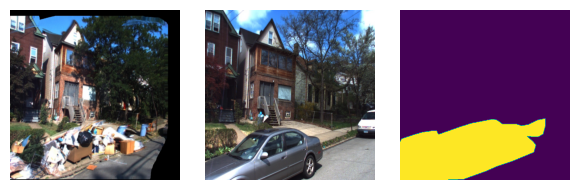

In [14]:
# wrapper for evaluation dataset

D = datasets.get_dataset("VL_CMU_CD", mode="test")

opt = {
    "batch-size": 4,
    "num-workers": 4,
}

wrapper = datasets.wrap_eval_dataset(opt, shuffle=False, figsize=[504, 504])
D = wrapper(D)

print(D)
print("length of D: %d\n" % len(D))

for output in D:
    break

t0, t1, mask = output
print("t0 shape:", t0.shape)
print("t1 shape:", t1.shape)
print("mask shape:", mask.shape)

fig, axs = plt.subplots(1, 3, figsize=(6, 2))
axs[0].imshow(t0[0].permute(1, 2, 0))
axs[1].imshow(t1[0].permute(1, 2, 0))
axs[2].imshow(mask[0])

for i in axs:
    i.axis("off")

fig.tight_layout()

D index : tensor([2687,   12, 2466, 2877])
t0 shape: torch.Size([4, 3, 504, 504])
t1 shape: torch.Size([4, 3, 504, 504])
mask shape: torch.Size([4, 504, 504])


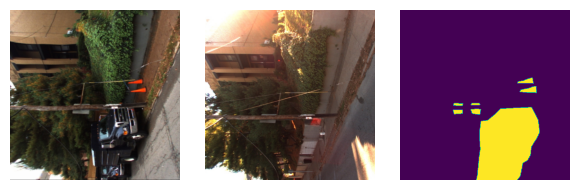

In [15]:
opt = {
    "batch-size": 4,
    "num-workers": 4,
    "hflip-prob": 0.5,
}

D = datasets.get_CMU_training_datasets_aug_diff(**opt)

for output in D:
    break

ind, (t0, t1, mask) = output
print("D index :", ind)
print("t0 shape:", t0.shape)
print("t1 shape:", t1.shape)
print("mask shape:", mask.shape)

fig, axs = plt.subplots(1, 3, figsize=(6, 2))

axs[0].imshow(t0[0].permute(1, 2, 0))
axs[1].imshow(t1[0].permute(1, 2, 0))
axs[2].imshow(mask[0])

for i in axs:
    i.axis("off")

fig.tight_layout()

D index : tensor([1379,  840,  191, 2474])
t0 shape: torch.Size([4, 3, 504, 504])
t1 shape: torch.Size([4, 3, 504, 504])
mask shape: torch.Size([4, 504, 504])


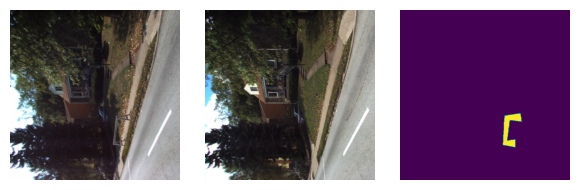

In [16]:
opt = {
    "batch-size": 4,
    "num-workers": 4,
    "hflip-prob": 0.5,
}

D = datasets.get_CMU_training_datasets(**opt)

for output in D:
    break

ind, (t0, t1, mask) = output
print("D index :", ind)
print("t0 shape:", t0.shape)
print("t1 shape:", t1.shape)
print("mask shape:", mask.shape)

fig, axs = plt.subplots(1, 3, figsize=(6, 2))

axs[0].imshow(t0[0].permute(1, 2, 0))
axs[1].imshow(t1[0].permute(1, 2, 0))
axs[2].imshow(mask[0])

for i in axs:
    i.axis("off")

fig.tight_layout()

    PSCD_Full

In [17]:
name = "PSCD_Full"

mode = "test"

dataset = datasets.get_dataset(name, mode=mode)

len(dataset)

77

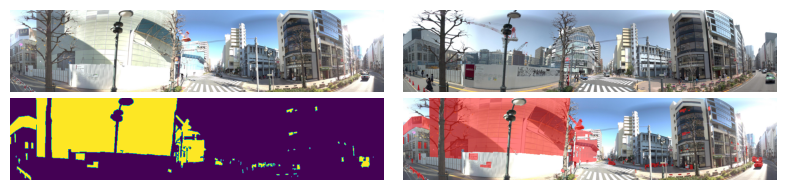

In [18]:
# get item

t0, t1, mask_0, mask_1 = dataset[10]

fig, axs = plt.subplots(2, 2, figsize=(8, 2))
axs[0, 0].imshow(t0)
axs[0, 1].imshow(t1)
axs[1, 0].imshow(mask_0)
axs[1, 1].imshow(
    utils_img.overlay_image(t0, [1, 0, 0], ratio=0.5, mask=mask_0)
)

for i in axs.ravel():
    i.axis("off")

fig.tight_layout()

In [19]:
# propoerties (uncomment to check each property)

dataset.filenames
dataset.figsize

array([ 224, 1024])

    PSCD

In [20]:
adj_dist = -1
adj_dist = 1
adj_dist = -2
adj_dist = 2

dataset1 = datasets.get_dataset("PSCD", mode=mode)
dataset2 = datasets.get_dataset(
    "PSCD_Diff_View",
    mode=mode,
    adjacent_distance=adj_dist,
)

len(dataset1), len(dataset2)

(1155, 1001)

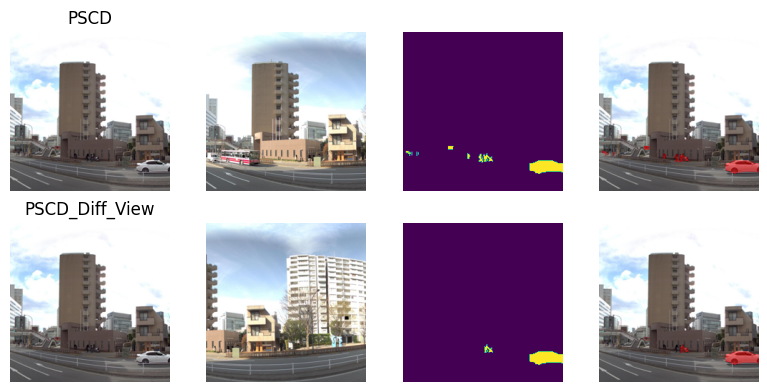

In [21]:
# get item

t0_1, t1_1, mask_1 = dataset1[10]
t0_2, t1_2, mask_2 = dataset2[10]

fig, axs = plt.subplots(2, 4, figsize=(8, 4))
axs[0, 0].imshow(t0_1)
axs[0, 1].imshow(t1_1)
axs[0, 2].imshow(mask_1)
axs[0, 3].imshow(
    utils_img.overlay_image(t0_1, [1, 0, 0], ratio=0.5, mask=mask_1),
)

axs[1, 0].imshow(t0_2)
axs[1, 1].imshow(t1_2)
axs[1, 2].imshow(mask_2)
axs[1, 3].imshow(
    utils_img.overlay_image(t0_2, [1, 0, 0], ratio=0.5, mask=mask_2),
)

axs[0, 0].set_title("PSCD")
axs[1, 0].set_title("PSCD_Diff_View")

for i in axs.ravel():
    i.axis("off")

fig.tight_layout()

In [22]:
# propoerties (uncomment to check each property)

dataset1.original_filenames
dataset1.filenames
dataset1.figsize

array([224, 224])

D index : tensor([2777, 1518, 4530, 7946])
t0 shape: torch.Size([4, 3, 224, 224])
t1 shape: torch.Size([4, 3, 224, 224])
mask shape: torch.Size([4, 224, 224])


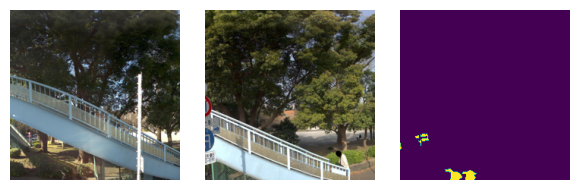

In [23]:
opt = {
    "batch-size": 4,
    "num-workers": 4,
    "hflip-prob": 0.5,
}

D = datasets.get_PSCD_training_datasets(**opt)

for output in D:
    break

ind, (t0, t1, mask) = output
print("D index :", ind)
print("t0 shape:", t0.shape)
print("t1 shape:", t1.shape)
print("mask shape:", mask.shape)

fig, axs = plt.subplots(1, 3, figsize=(6, 2))

axs[0].imshow(t0[0].permute(1, 2, 0))
axs[1].imshow(t1[0].permute(1, 2, 0))
axs[2].imshow(mask[0])

for i in axs:
    i.axis("off")

fig.tight_layout()

    torch_utils demonstration

In [24]:
from torchvision import transforms as tvf

original    dataset has 429 samples
transformed dataset has 429 samples


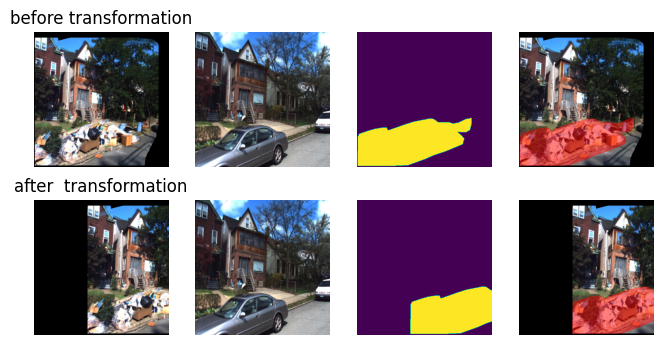

In [25]:
# transformation (specify translate pixel and rotate degree)

dataset_before = datasets.get_dataset("VL_CMU_CD", mode="test")

dataset_after = torch_utils.CDDataWrapper(
    dataset_before,
    transform=tvf.ToTensor(),
    target_transform=tvf.ToTensor(),
    translate0=(200, 0),
    translate1=(0, -0),
    rotate_angle0=0,
    rotate_angle1=0,
    hflip_prob=0.0,
)

print("original    dataset has", len(dataset_before), "samples")
print("transformed dataset has", len(dataset_after), "samples")

t0_before, t1_before, mask_before = dataset_before[0]
t0_after, t1_after, mask_after = dataset_after[0]

t0_after = t0_after.numpy().transpose(1, 2, 0)
t1_after = t1_after.numpy().transpose(1, 2, 0)
mask_after = mask_after.numpy().squeeze()

fig, axs = plt.subplots(2, 4, figsize=(8, 4))

axs[0, 0].imshow(t0_before)
axs[0, 1].imshow(t1_before)
axs[0, 2].imshow(mask_before)
axs[0, 3].imshow(
    utils_img.overlay_image(t0_before, [1, 0, 0], ratio=0.5, mask=mask_before)
)

axs[1, 0].imshow(t0_after)
axs[1, 1].imshow(t1_after)
axs[1, 2].imshow(mask_after)
axs[1, 3].imshow(
    utils_img.overlay_image(t0_after, [1, 0, 0], ratio=0.5, mask=mask_after)
)

axs[0, 0].set_title("before transformation")
axs[1, 0].set_title("after  transformation")

for i in axs.ravel():
    i.axis("off")

original    dataset has 429 samples
transformed dataset has 429 samples


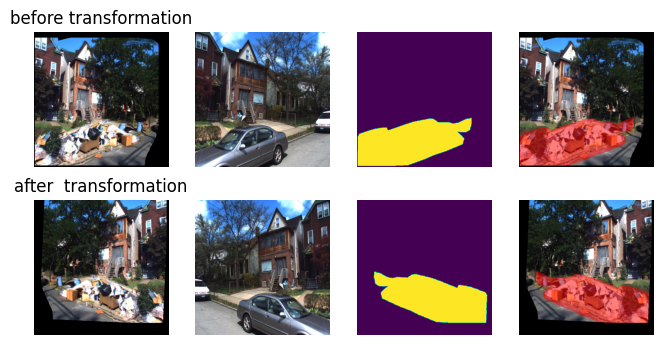

In [26]:
# transformation (randomly transformation)

dataset_before = datasets.get_dataset("VL_CMU_CD", mode="test")

dataset_after = torch_utils.CDDataWrapper(
    dataset_before,
    transform=tvf.ToTensor(),
    target_transform=tvf.ToTensor(),
    hflip_prob=0.9,
    augment_diff_degree=20,
    augment_diff_translate=[-100, 100],
)

print("original    dataset has", len(dataset_before), "samples")
print("transformed dataset has", len(dataset_after), "samples")

t0_before, t1_before, mask_before = dataset_before[0]
t0_after, t1_after, mask_after = dataset_after[0]

t0_after = t0_after.numpy().transpose(1, 2, 0)
t1_after = t1_after.numpy().transpose(1, 2, 0)
mask_after = mask_after.numpy().squeeze()

fig, axs = plt.subplots(2, 4, figsize=(8, 4))

axs[0, 0].imshow(t0_before)
axs[0, 1].imshow(t1_before)
axs[0, 2].imshow(mask_before)
axs[0, 3].imshow(
    utils_img.overlay_image(t0_before, [1, 0, 0], ratio=0.5, mask=mask_before)
)

axs[1, 0].imshow(t0_after)
axs[1, 1].imshow(t1_after)
axs[1, 2].imshow(mask_after)
axs[1, 3].imshow(
    utils_img.overlay_image(t0_after, [1, 0, 0], ratio=0.5, mask=mask_after)
)

axs[0, 0].set_title("before transformation")
axs[1, 0].set_title("after  transformation")

for i in axs.ravel():
    i.axis("off")